## NAVADEEP PASALA
## The Spark Foundation (Graduate Rotational Internship Program)
## Data Science & Business Analytics
## TASK 1: PREDICTION USING SUPERVISED ML

### TASK:
**- Predict the percentage of an student based on the no. of study hours.**

**- Data can be found at http://bit.ly/w-data**

**- What will be predicted score if a student studies for 9.25 hrs/ day?**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()

**Load and read the data**

In [2]:
Data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(Data)
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


**Description of the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data visualization**

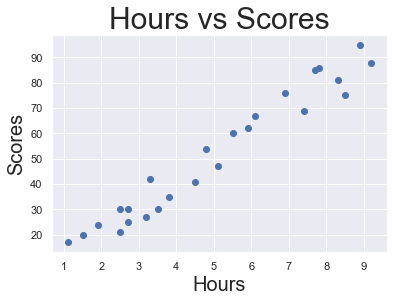

In [5]:
y = data['Scores']
x1 = data['Hours']
plt.scatter(x1,y)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours vs Scores',fontsize=30)
plt.show()

**Seperate the dependent and independent variable for regression**

In [7]:
x1 = data.iloc[:,:-1].values
y = data.iloc[:,1].values

**Split training and testing data to check for overfitting**

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,train_size = 0.75,random_state=42)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


**Preforming simple linear regression**

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plot the regression line**

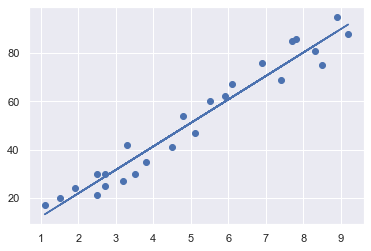

In [11]:
slope = reg.coef_
intercept = reg.intercept_

regline = slope*x1 + intercept

plt.scatter(x1,y)
plt.plot(x1,regline)
plt.show()

**Perform the regression in the test data and compare accuracy with train accuracy**

In [12]:
a = reg.score(x_train,y_train)*100
b = reg.score(x_test,y_test)*100

print("Training Accuracy = ",a)
print("Test Accuract = ",b)

Training Accuracy =  95.14783240656936
Test Accuract =  95.53509219739938


**Compare the actual and predicted values for the test dataset**

In [13]:
y_predicted = reg.predict(x_test)
df = pd.DataFrame({"y_Actual" : y_test, "y_Predicted" : y_predicted})
df

,y_Actual,y_Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


# EVALUATE THE MODEL

In [ ]:
from sklearn import metrics

print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_predicted))
print("The R^2 value is : ",reg.score(x_test,y_test))

# WHAT WILL BE THE SCORE  IF A STUDENT STUDIES FOR 9.25 HRS/DAY ?

In [15]:
pred = reg.predict([[9.25]])

print("For 9.25 hours of study per day, this model predicts that the student will score",pred[0])

For 9.25 hours of study per day, this model predicts that the student will score 92.33571987331146
